In [ ]:
!unzip "/content/disease symptom analysis.zip"

Archive:  /content/disease symptom analysis.zip
  inflating: Symptom-severity.csv    
  inflating: dataset.csv             
  inflating: symptom_Description.csv  
  inflating: symptom_precaution.csv  


In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 70.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
symptoms=pd.read_csv("/content/Symptom-severity.csv")
data=pd.read_csv("/content/dataset.csv")
symp_new=sum(symptoms[["Symptom"]].values.tolist(),[])
symp_new


['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 

In [ ]:
values = [0.0] * 133
encoded = []

for i in range(len(data)):
    row = data.iloc[i].values
    temp = dict(zip(symp_new, values))

    for i in row:
        if i is not np.nan:
            temp[i.strip()] = 1.0

    encoded.append(temp)

pre_process = pd.DataFrame(data=encoded)
pre_process['disease'] = data['Disease']
pre_process.fillna(value=0,inplace=True)

pre_process.to_csv('pre_processed.csv')
df=pd.read_csv('pre_processed.csv')
df.drop(df.columns[0],axis=1, inplace=True)

In [ ]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,foul_smell_of urine,Psoriasis,Impetigo,disease
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
le.fit(df[["disease"]])
X= df[symp_new]
y = le.transform(df[["disease"]])
np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
forest = RandomForestClassifier()
forest_params = [{'max_depth': list(range(25, 30)), 'n_estimators': list(range(50, 70))}]
clf = GridSearchCV(forest, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 25, 'n_estimators': 50}
1.0


In [ ]:
forest1 = RandomForestClassifier(n_estimators=50, max_depth=25)
forest1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(forest1.score(X_test, y_test)))
c=0
for i in list(forest1.feature_importances_):
  if i==0.0:
    c+=1
print("Number of features with no importances: ",c)

Accuracy on training set: 1.000
Accuracy on testing set: 1.000
Number of features with no importances:  4


Feature importances:
[0.01298143 0.00553371 0.01034783 0.00571952 0.00618501 0.00698877
 0.01028459 0.01331079 0.00793026 0.00853032 0.00860406 0.01015424
 0.0040939  0.         0.01510651 0.00114401 0.00344833 0.00058298
 0.00456717 0.01209694 0.00373343 0.00392504 0.00531994 0.00530606
 0.00610519 0.01320351 0.00595128 0.00746125 0.00896484 0.00995092
 0.00644745 0.00912792 0.00679017 0.01396448 0.01616711 0.00827181
 0.0109968  0.01099484 0.00976762 0.00939103 0.01096452 0.0196543
 0.0042485  0.00963872 0.00446622 0.00875982 0.00316425 0.00798812
 0.00721966 0.00251848 0.01005027 0.00240985 0.00494892 0.00409233
 0.005608   0.00446874 0.01119802 0.01040228 0.0146745  0.00485035
 0.00553124 0.00627435 0.00630779 0.00800439 0.00586116 0.00366654
 0.00815547 0.00397324 0.00256874 0.00058187 0.00243841 0.00510753
 0.003531   0.00910352 0.00277981 0.00726329 0.0039114  0.01069803
 0.00872175 0.0081373  0.00780371 0.00526845 0.00721012 0.0095555
 0.00486356 0.01186071 0.01073502 0.0042475

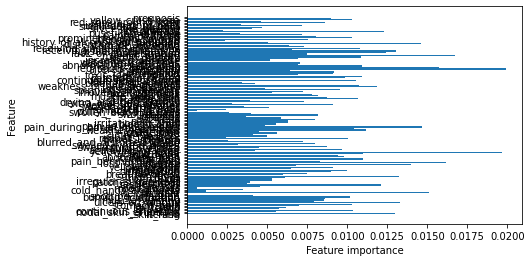

In [ ]:
print("Feature importances:\n{}".format(forest1.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest1)

In [ ]:
diseases=list(y)
disease_dict={}
c=0
for i in diseases:
  c+=1
  disease_dict[i]=le.inverse_transform([i])[0]
disease_dict

{15: 'Fungal infection',
 4: 'Allergy',
 16: 'GERD',
 9: 'Chronic cholestasis',
 14: 'Drug Reaction',
 33: 'Peptic ulcer diseae',
 1: 'AIDS',
 12: 'Diabetes ',
 17: 'Gastroenteritis',
 6: 'Bronchial Asthma',
 23: 'Hypertension ',
 30: 'Migraine',
 7: 'Cervical spondylosis',
 32: 'Paralysis (brain hemorrhage)',
 28: 'Jaundice',
 29: 'Malaria',
 8: 'Chicken pox',
 11: 'Dengue',
 37: 'Typhoid',
 40: 'hepatitis A',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 3: 'Alcoholic hepatitis',
 36: 'Tuberculosis',
 10: 'Common Cold',
 34: 'Pneumonia',
 13: 'Dimorphic hemmorhoids(piles)',
 18: 'Heart attack',
 39: 'Varicose veins',
 26: 'Hypothyroidism',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 31: 'Osteoarthristis',
 5: 'Arthritis',
 0: '(vertigo) Paroymsal  Positional Vertigo',
 2: 'Acne',
 38: 'Urinary tract infection',
 35: 'Psoriasis',
 27: 'Impetigo'}

In [ ]:
loc=600
symp_new=list(symp_new)
print(len(symp_new))
testx=np.zeros(len(symp_new),dtype=int)
testy=data[["Disease"]].iloc[loc-1:loc]
sample=np.array(data.iloc[loc-1:loc,1:])
for i in list(sample[0]):
  if type(i)==str:
    i=i[1:]
    if i in symp_new:
      testx[symp_new.index(i)]=1

cls=forest1.predict([testx])  
print(sample[0]) 
print(disease_dict[cls[0]])
print(testy)

133
[' chills' ' fatigue' ' high_fever' ' headache' ' nausea' ' constipation'
 ' abdominal_pain' ' diarrhoea' ' toxic_look_(typhos)' ' belly_pain' nan
 nan nan nan nan nan nan]
Typhoid
     Disease
599  Typhoid


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
file=open("randomforest.pkl","wb")
pickle.dump(forest1,file)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
correct=0
for loc in range(1,4921):
  symp_new=list(symp_new)
  testx=np.zeros(len(symp_new),dtype=int)
  testy=str(data[["Disease"]].iloc[loc-1:loc])
  sample=np.array(data.iloc[loc-1:loc,1:])
  for i in list(sample[0]):
    if type(i)==str:
      i=i[1:]
      if i in symp_new:
        testx[symp_new.index(i)]=1

  cls=disease_dict[forest1.predict([testx])[0]] 
  if cls in testy:
    correct+=1

print("correct predictions; ",correct)
print("Accuracy: ",(correct/4920)*100)

correct predictions;  4920
Accuracy:  100.0
